Análisis de las características geopolíticas, económicas y sociales utilizando una Red de Kohonen.

Comenzamos leyendo los datos del archivo csv que se utilizará para entrenar la red. Estos se encuentran en el archivo "europe.csv".
Además, contamos con un archivo de configuración "kohonen_2.json" que contiene los parámetros de la red de Kohonen que se utilizará para el análisis.

In [25]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
from core.kohonen import Kohonen

config_file = "../configs/kohonen_2.json"

with open(config_file) as f:
    config = json.load(f)

europe_data = pd.read_csv(config['data']['source'])
df = europe_data[config['data']['features']]
scaler = StandardScaler()
data = scaler.fit_transform(df.values) # we need to scale the data
#print(data.shape) # we've got 28 elements with 7 features
#print(data)
weights = None
current_grid_size = 5
current_iterations = 1000

Pasamos a inicializar y entrenar la red de Kohonen con un `grid_size` de 5x5 y 1000 iteraciones.

In [26]:

from utils.eta_function import str_to_eta_function
from utils.radius_function import str_to_radius_function
from utils.similarity_function import str_to_similarity_function

som = Kohonen(
    data=data,
    grid_size=current_grid_size,
    learning_rate=config['kohonen']['learning_rate'],
    eta_function=str_to_eta_function(config['kohonen']['eta_function']),
    radius=config['kohonen']['initial_radius'],
    radius_function=str_to_radius_function(config['kohonen']['radius_function']),
    similarity_function=str_to_similarity_function(config['kohonen']['similarity_function']),
    seed=config['kohonen']['seed'],
    weights=weights
)

som.train(current_iterations)

Ahora que la red está entrenada, podemos visualizar los resultados. Primero vamos a mappear los datos de entrada a las neuronas ganadoras y luego vamos a graficar los resultados.

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def flatten_matrix(size: tuple[int, int], index: tuple[int, int]) -> int:
    # Extract the number of rows and columns from the size tuple
    num_rows, num_columns = size
    
    # Extract the row and column indices from the index tuple
    row, column = index
    
    # Check if the provided indices are within the matrix bounds
    if not (0 <= row < num_rows and 0 <= column < num_columns):
        raise ValueError("Index out of bounds")
    
    # Calculate the flat index using the row-major order formula
    flat_index = row * num_columns + column
    
    return flat_index

def map_countries_to_bmus(data, kohonen_net: Kohonen, grid_size:int):
    bmu_mapping = {}
    for i, sample in enumerate(data):
        bmu = kohonen_net.find_bmu(sample)
        bmu = flatten_matrix((grid_size, grid_size), bmu)
        country_name = europe_data['Country'].iloc[i]
        if bmu not in bmu_mapping:
            bmu_mapping[bmu] = [country_name]
        else:
            bmu_mapping[bmu].append(country_name)
    return bmu_mapping

bmu_mapping = map_countries_to_bmus(data, som, current_grid_size)

bmu_mapping

{23: ['Austria'],
 18: ['Belgium', 'Denmark'],
 0: ['Bulgaria',
  'Estonia',
  'Hungary',
  'Latvia',
  'Lithuania',
  'Poland',
  'Ukraine'],
 1: ['Croatia', 'Slovakia'],
 12: ['Czech Republic'],
 20: ['Finland', 'Italy', 'Sweden'],
 21: ['Germany'],
 3: ['Greece', 'Portugal'],
 24: ['Iceland',
  'Ireland',
  'Luxembourg',
  'Netherlands',
  'Norway',
  'Switzerland'],
 11: ['Slovenia'],
 4: ['Spain', 'United Kingdom']}

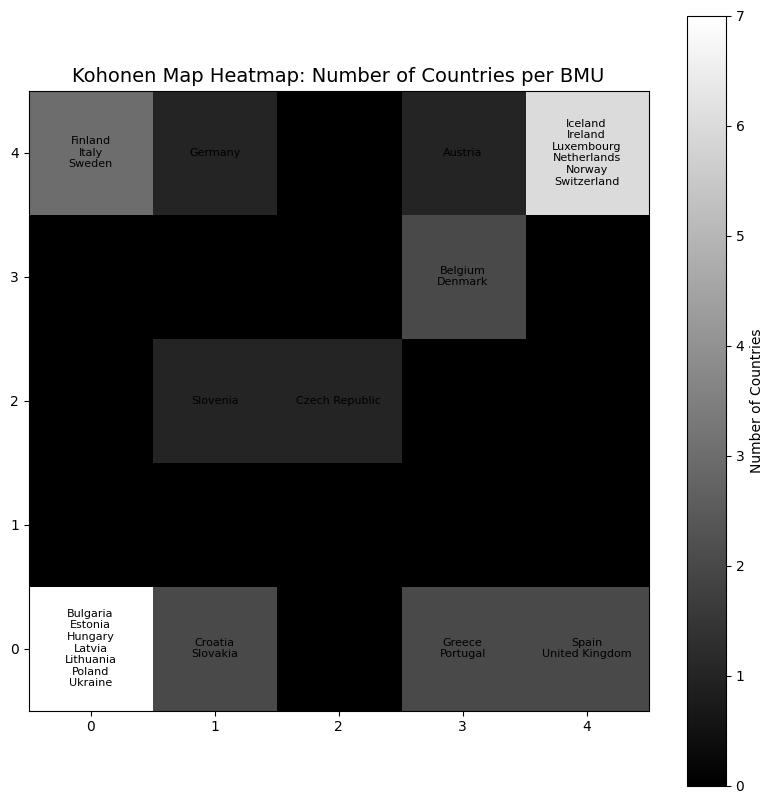

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

def plot_bmu_mapping(bmu_mapping: dict, grid_size: int, char_limit: int = 12):
    heatmap = np.zeros((grid_size, grid_size))

    for bmu in bmu_mapping:
        row = bmu // grid_size
        column = bmu % grid_size
        heatmap[row, column] = len(bmu_mapping[bmu])

    plt.figure(figsize=(10, 10))
    plt.title('Kohonen Map Heatmap: Number of Countries per BMU', fontsize=14)

    # Create custom colormap
    colors = [(0, 0, 0), (1, 1, 1)]  # Darker grey to blue to white
    cmap_name = 'custom_blue'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

    plt.imshow(heatmap, cmap=cm, interpolation='nearest')
    cbar = plt.colorbar(label='Number of Countries')
    cbar.set_ticks(np.arange(0, heatmap.max()+1, 1))

    plt.xticks(range(grid_size))
    plt.yticks(range(grid_size))
    plt.gca().invert_yaxis()

    for bmu in bmu_mapping:
        row = bmu // grid_size
        column = bmu % grid_size
        countries = [country if len(country) <= char_limit else country[:char_limit] + "..." for country in bmu_mapping[bmu]]
        countries_text = "\n".join(countries)
        plt.text(column, row, countries_text, ha='center', va='center', fontsize=8, color='black', wrap=True)

    plt.show()

plot_bmu_mapping(bmu_mapping, current_grid_size, char_limit=15)



Ahora vamos a probar con un tamaño de red de 3x3 y 1000 iteraciones.

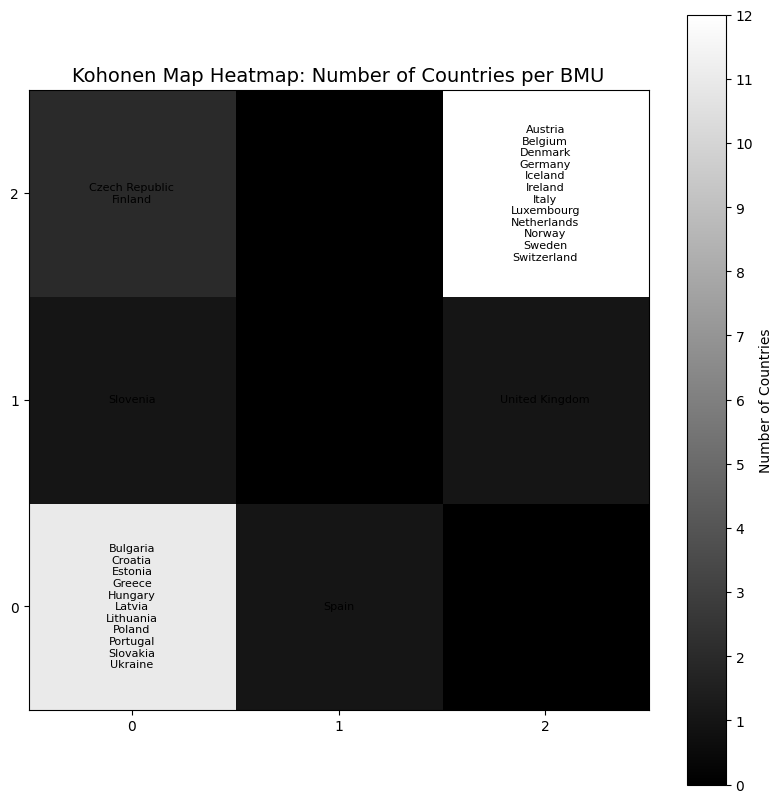

In [29]:
from utils.eta_function import str_to_eta_function
from utils.radius_function import str_to_radius_function
from utils.similarity_function import str_to_similarity_function

current_grid_size = 3

som = Kohonen(
    data=data,
    grid_size=current_grid_size,
    learning_rate=config['kohonen']['learning_rate'],
    eta_function=str_to_eta_function(config['kohonen']['eta_function']),
    radius=config['kohonen']['initial_radius'],
    radius_function=str_to_radius_function(config['kohonen']['radius_function']),
    similarity_function=str_to_similarity_function(config['kohonen']['similarity_function']),
    seed=config['kohonen']['seed'],
    weights=weights
)

som.train(current_iterations)

bmu_mapping = map_countries_to_bmus(data, som, current_grid_size)

plot_bmu_mapping(bmu_mapping, current_grid_size, char_limit=20)

Ahora vamos a probar con un tamaño de red de 10x10 y 1000 iteraciones.

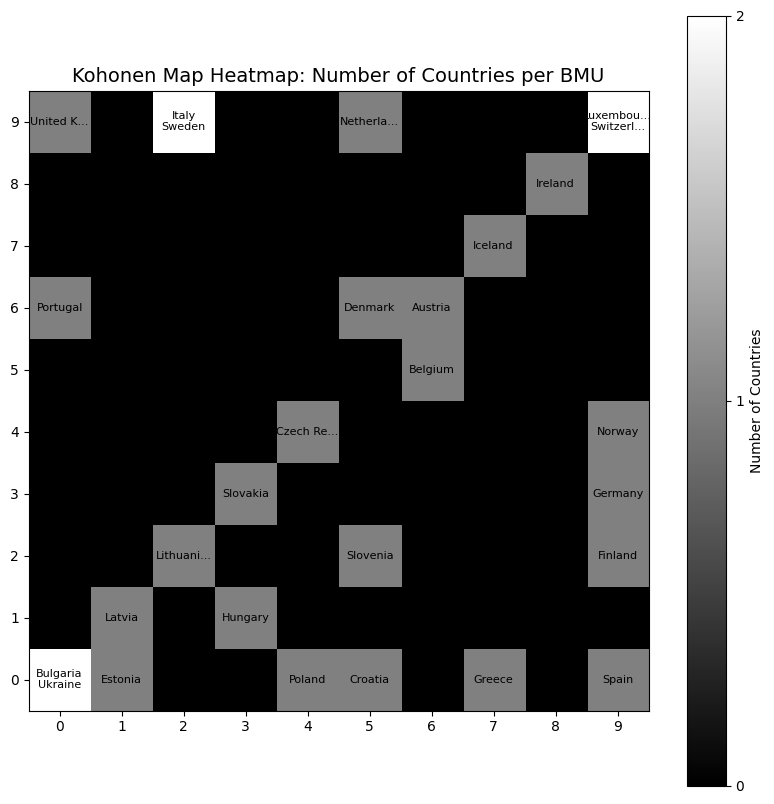

In [30]:
from utils.eta_function import str_to_eta_function
from utils.radius_function import str_to_radius_function
from utils.similarity_function import str_to_similarity_function

current_grid_size = 10

som = Kohonen(
    data=data,
    grid_size=current_grid_size,
    learning_rate=config['kohonen']['learning_rate'],
    eta_function=str_to_eta_function(config['kohonen']['eta_function']),
    radius=config['kohonen']['initial_radius'],
    radius_function=str_to_radius_function(config['kohonen']['radius_function']),
    similarity_function=str_to_similarity_function(config['kohonen']['similarity_function']),
    seed=config['kohonen']['seed'],
    weights=weights
)

som.train(current_iterations)

bmu_mapping = map_countries_to_bmus(data, som, current_grid_size)

plot_bmu_mapping(bmu_mapping, current_grid_size, char_limit=8)

*Conclusiones:*

`    - Si el tamaño de la red es muy grande, aumentan las neuronas muertas y disminuye la agrupación. Esto no aporta información útil.`

`    - Si el tamaño de la red es muy pequeño, se pierde información. Pues las neuronas se agrupan en exceso.`
